In [28]:

import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

dataset = pd.read_csv(r'moods_preprocessed.csv')

dataset.head()


,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.625,0.779912,Happy
1,1,120.255,0.196000,0.01890,0.832,0.166,0.852145,Sad
2,2,136.168,0.000077,0.91300,0.139,0.116,0.615590,Sad
3,3,193.100,0.000006,0.08900,0.438,0.587,0.672509,Happy
4,4,169.881,0.000000,0.00171,0.932,0.445,0.885932,Energetic


In [29]:
dataset['mood']=dataset['mood'].map({'Happy':0, 'Sad':1, 'Energetic': 2, 'Calm':3 }).astype(int)
dataset.head()


,Unnamed: 0,tempo,instrumentalness,acousticness,energy,valence,loudness,mood
0,0,118.523,0.000000,0.13700,0.730,0.625,0.779912,0
1,1,120.255,0.196000,0.01890,0.832,0.166,0.852145,1
2,2,136.168,0.000077,0.91300,0.139,0.116,0.615590,1
3,3,193.100,0.000006,0.08900,0.438,0.587,0.672509,0
4,4,169.881,0.000000,0.00171,0.932,0.445,0.885932,2


In [30]:
data= pd.DataFrame(dataset, columns=['tempo', 'acousticness', 'instrumentalness', 'valence', 'energy', 'loudness', 'mood'])
data.head()
x_data=data.drop(['mood'], axis=1)
y_data=data['mood']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)


In [31]:
from xgboost import XGBClassifier
model = XGBClassifier(
    eta = 0.1, 
    max_depth= 2,  
    objective= 'multi:softprob',  
    num_class= 4)

In [32]:
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset)

[0]	validation_0-mlogloss:1.27713	validation_1-mlogloss:1.27877
[1]	validation_0-mlogloss:1.18663	validation_1-mlogloss:1.18869
[2]	validation_0-mlogloss:1.10842	validation_1-mlogloss:1.10991
[3]	validation_0-mlogloss:1.04114	validation_1-mlogloss:1.04146
[4]	validation_0-mlogloss:0.98332	validation_1-mlogloss:0.98453
[5]	validation_0-mlogloss:0.93161	validation_1-mlogloss:0.93251
[6]	validation_0-mlogloss:0.88668	validation_1-mlogloss:0.88866
[7]	validation_0-mlogloss:0.84621	validation_1-mlogloss:0.85000
[8]	validation_0-mlogloss:0.80974	validation_1-mlogloss:0.81436
[9]	validation_0-mlogloss:0.77659	validation_1-mlogloss:0.78319
[10]	validation_0-mlogloss:0.74711	validation_1-mlogloss:0.75441
[11]	validation_0-mlogloss:0.72001	validation_1-mlogloss:0.72835
[12]	validation_0-mlogloss:0.69558	validation_1-mlogloss:0.70492
[13]	validation_0-mlogloss:0.67317	validation_1-mlogloss:0.68350
[14]	validation_0-mlogloss:0.65287	validation_1-mlogloss:0.66466
[15]	validation_0-mlogloss:0.63267	

C:\Users\Florence\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-mlogloss:0.53335	validation_1-mlogloss:0.55431
[23]	validation_0-mlogloss:0.52278	validation_1-mlogloss:0.54444
[24]	validation_0-mlogloss:0.51257	validation_1-mlogloss:0.53480
[25]	validation_0-mlogloss:0.50254	validation_1-mlogloss:0.52667
[26]	validation_0-mlogloss:0.49371	validation_1-mlogloss:0.51955
[27]	validation_0-mlogloss:0.48493	validation_1-mlogloss:0.51148
[28]	validation_0-mlogloss:0.47705	validation_1-mlogloss:0.50586
[29]	validation_0-mlogloss:0.46976	validation_1-mlogloss:0.50010
[30]	validation_0-mlogloss:0.46292	validation_1-mlogloss:0.49328
[31]	validation_0-mlogloss:0.45540	validation_1-mlogloss:0.48724
[32]	validation_0-mlogloss:0.44784	validation_1-mlogloss:0.48074
[33]	validation_0-mlogloss:0.44088	validation_1-mlogloss:0.47571
[34]	validation_0-mlogloss:0.43538	validation_1-mlogloss:0.47131
[35]	validation_0-mlogloss:0.42888	validation_1-mlogloss:0.46699
[36]	validation_0-mlogloss:0.42267	validation_1-mlogloss:0.46095
[37]	validation_0-mloglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)

In [34]:
print('Accuracy: %.3f' % score)

Accuracy: 0.833


In [35]:
results = model.evals_result()

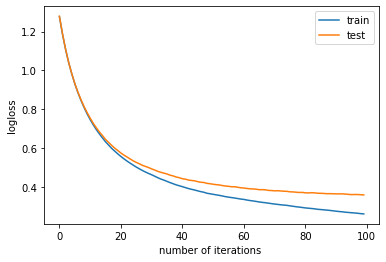

In [36]:
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='test')
plt.xlabel('number of iterations ')
plt.ylabel('logloss')
# show the legend
plt.legend()
# show the plot
plt.show()